In [1]:
from trainer import *
from dataloaders import UnSupKittiDataset

In [2]:
with open('configs/basic_config.yaml') as file:
    config = yaml.full_load(file)
    
trainer = Trainer(config)

Training from scratch..
Initializing samples..


In [3]:
data_loader = trainer.train_loader
batch       = next(iter(data_loader))

In [4]:
tgt_imgs    = batch['tgt']
ref_imgs    = batch['ref_imgs']
intrinsics  = batch['intrinsics']
oxts        = batch['oxts']
depth       = batch['groundtruth']

In [5]:
depth

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [6]:
# plt.figure(figsize=(20, 20))
# plt.imshow(depth_img, cmap='gray')

from utils.transform import Transform
warper = Transform(intrinsics, None, tgt_imgs[0].shape[0], tgt_imgs[0].shape[1])

In [7]:
warper.project_img_to_cam_np(depth[0])

(3, 466616)
[[0.000e+00 1.000e+00 2.000e+00 ... 1.238e+03 1.239e+03 1.240e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 3.750e+02 3.750e+02 3.750e+02]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]
(466616, 3)
[[0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 0.000e+00 0.000e+00]
 [2.000e+00 0.000e+00 0.000e+00]
 ...
 [1.238e+03 3.750e+02 0.000e+00]
 [1.239e+03 3.750e+02 0.000e+00]
 [1.240e+03 3.750e+02 0.000e+00]]


IndexError: index 3 is out of bounds for dimension 1 with size 3

torch.Size([3, 376, 1241])


TypeError: Invalid shape (3, 1241, 376) for image data

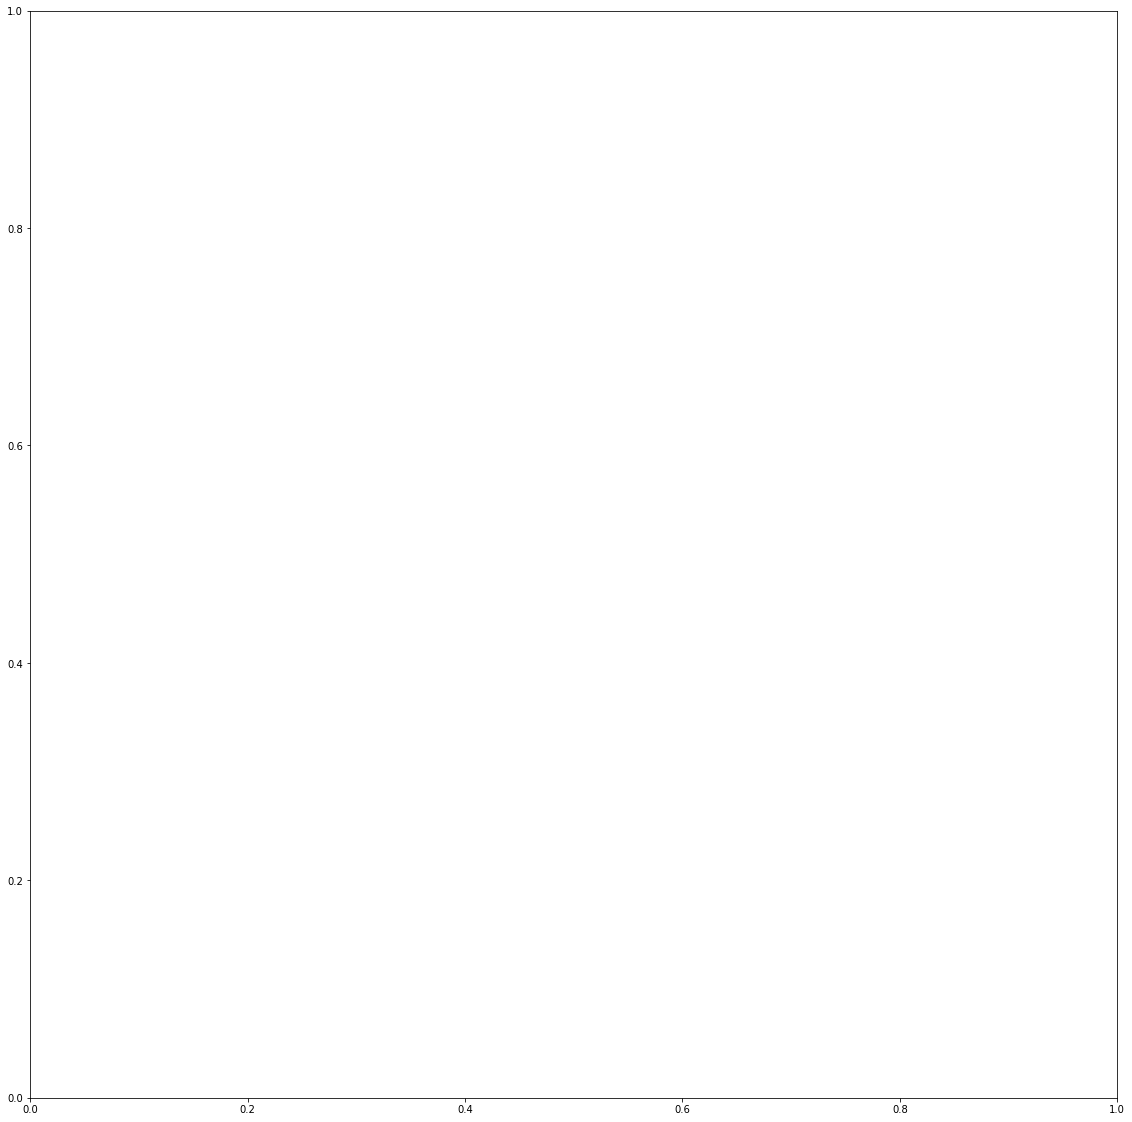

In [33]:
# helper functions
def set_id_grid(depth):
        
    b, h, w = depth.size()
    i_range = torch.arange(0, h).view(1, h, 1).expand(1, h, w).type_as(depth)  # [1, H, W]
    j_range = torch.arange(0, w).view(1, 1, w).expand(1, h, w).type_as(depth)  # [1, H, W]
    ones = torch.ones(1, h, w).type_as(depth)

    pixel_coords = torch.stack((j_range, i_range, ones), dim=1)  # [1, 3, H, W]
    return pixel_coords

def project_img_to_cam(depth_img, intrinsics):
    b, h, w = depth.size()
    
    pixel_coords = set_id_grid(depth_img)
    current_pixel_coords = pixel_coords[..., :h, :w].expand(b, 3, h, w).reshape(b, 3, -1)  # [B, 3, H*W]
    
    K_inv = intrinsics[..., 0:3, 0:3].inverse().type_as(depth)
    
    cam_coords = (K_inv @ current_pixel_coords).reshape(b, 3, h, w)
    
    return cam_coords * depth.unsqueeze(1)
    

# inverse warp one image
def inverse_warp(tgt_imgs, ref_imgs, depth_imgs, poses, intrinsics):
    
    
    
    # project depth to cam frame
    cam_coords = project_img_to_cam(depth, intrinsics)
    
    # transform to refrence image frame with pose
    
    # reconstruct refrence image by projecting 
    # to ref frame using intrinsic matrix
    
    # sample to form refrence image
    
    # return 

inverse_warp(tgt_imgs, ref_imgs, depth, oxts, intrinsics)
    